In [3]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


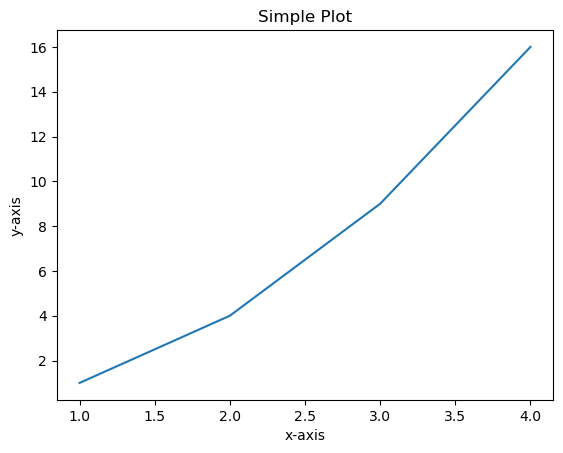

In [10]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Simple Plot')
plt.show()


In [17]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [18]:
len(x_train)

60000

In [21]:
x_train[1500].shape

(28, 28)

In [27]:
y_train[1500]

9

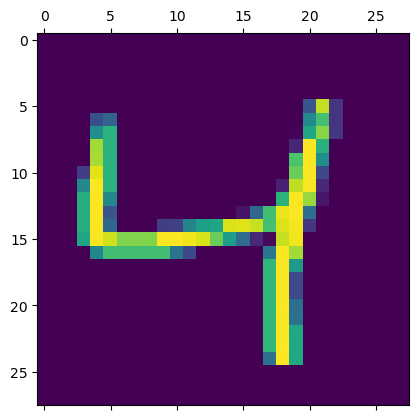

In [31]:
plt.matshow(x_train[2])

In [29]:
x_train[1500]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [72]:

x_train = x_train / 255
x_test = x_test / 255 
#scaling for better accuracy

In [64]:

x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [65]:
x_train_flattened.shape


(60000, 784)

In [66]:

x_test_flattened.shape


(10000, 784)

In [73]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [74]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [75]:
model= keras.Sequential([#dense (output,input,function)
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')#input shape ek empty tuple hai jiske firsr value di hui hai (jaruri)
])
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',#categories me baat rahe hai wo bhi integer wali
        metrics=['accuracy']#ye list,tuple ya dict honi chaiye 
)
model.fit(x_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8100 - loss: 0.7140
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9148 - loss: 0.3083
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9200 - loss: 0.2865
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9242 - loss: 0.2699
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9267 - loss: 0.2636
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9278 - loss: 0.2585


In [76]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9149 - loss: 0.3050


[0.26866596937179565, 0.9251999855041504]

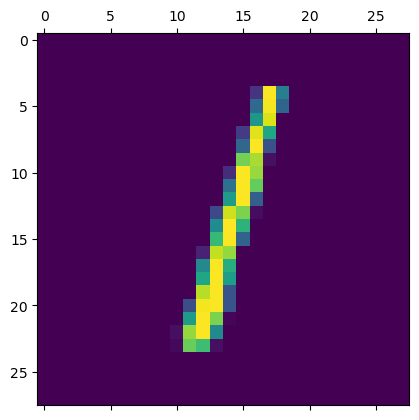

In [77]:
plt.matshow(x_test[2])

In [78]:
saving_list=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


In [79]:
saving_list[2]

array([2.9928033e-04, 9.9460691e-01, 7.3052001e-01, 3.2796898e-01,
       2.3523612e-02, 1.1123013e-01, 2.1621700e-01, 1.3118872e-01,
       4.3628323e-01, 5.5855736e-02], dtype=float32)

In [81]:
np.argmax(saving_list[2])#label kar raha hai max value ko

1

In [82]:
y_predicted=[np.argmax(i) for i in saving_list] 

In [86]:
y_test[:5]#first 5 ko print kar raha hai

array([7, 2, 1, 0, 4], dtype=uint8)

In [84]:
y_predicted[22:5]

[7, 2, 1, 0, 4]

In [91]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [   5,    8,  933,   15,    6,    1,   13,    9,   37,    5],
       [   2,    0,   25,  919,    0,   16,    3,   11,   26,    8],
       [   1,    1,    6,    1,  902,    0,   15,    5,   10,   41],
       [  12,    3,    4,   38,    8,  744,   24,    7,   44,    8],
       [   8,    3,    6,    1,    7,    6,  923,    2,    2,    0],
       [   1,    5,   27,    6,    5,    0,    0,  946,    2,   36],
       [   7,    6,    8,   16,    8,   16,   11,   11,  881,   10],
       [  10,    7,    2,    8,   20,    5,    0,   21,    7,  929]])>

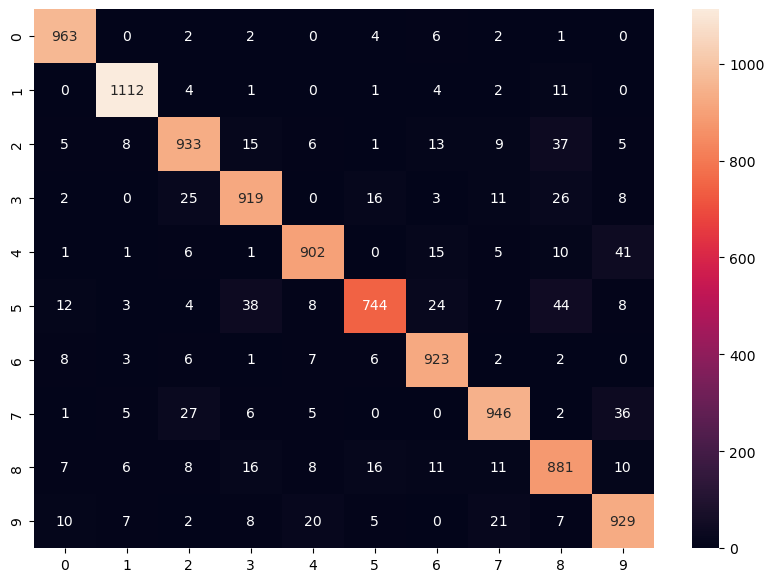

In [92]:
#some code to see confusion matrix more easily
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel='predicted'
plt.ylabel='truth'

In [95]:
#now we will improve the accuracy by adding a hidden layer
model= keras.Sequential([#dense (output,input,function)
    keras.layers.Dense(100,input_shape=(28*28,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')#input shape ek empty tuple hai jiske firsr value di hui hai (jaruri)
])
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',#categories me baat rahe hai wo bhi integer wali
        metrics=['accuracy']#ye list,tuple ya dict honi chaiye 
)
model.fit(x_train_flattened,y_train,epochs=6)

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.4418
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9576 - loss: 0.1422
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9729 - loss: 0.0907
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0686
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0500
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0412


In [96]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9693 - loss: 0.1004


[0.0852859690785408, 0.9735000133514404]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


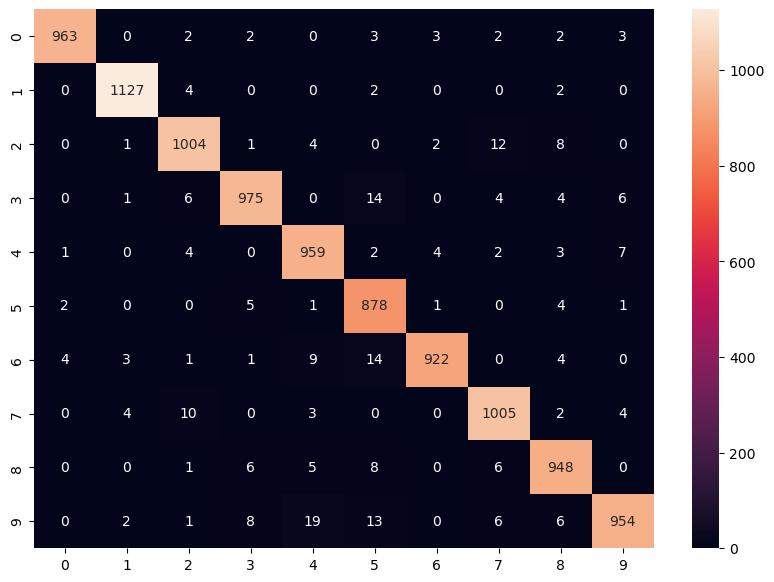

In [97]:
saving_list=model.predict(x_test_flattened)
y_predicted=[np.argmax(i) for i in saving_list] 
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel='predicted'
plt.ylabel='truth'

In [99]:
#ab agar flattened metric nhi banani aur directly train karna hai then uske liye keras ke andr flatten function hota hai\

model= keras.Sequential([#dense (output,input,function)
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')#input shape ek empty tuple hai jiske firsr value di hui hai (jaruri)
])
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',#categories me baat rahe hai wo bhi integer wali
        metrics=['accuracy']#ye list,tuple ya dict honi chaiye 
)
model.fit(x_train,y_train,epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1111 - loss: 2.3016
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1140 - loss: 2.3012
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1112 - loss: 2.3017
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1126 - loss: 2.3016
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1099 - loss: 2.3018
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1119 - loss: 2.3012
